# Description

This Notebook is trying to train a dataset of the middle tier of hoursing price in US metro breakdown with Random Forest Regression. We have the location info as States, and the July price of 2021 and 2020. We want to predict the housing price of July 2022

In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
AllData_df = pd.read_csv("../Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
AllData_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,...,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22
0,102001,0,United States,Country,NaN,128193.0,128540.0,128904.0,129647.0,130396.0,...,315164.0,319079.0,323445.0,328180.0,333400.0,338673.0,344230,349265,353446,355852
1,394913,1,"New York, NY",Msa,NY,225281.0,226627.0,227838.0,230222.0,232442.0,...,571576.0,575145.0,578396.0,582369.0,587022.0,593470.0,600621,608159,614185,618517
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,228935.0,229732.0,230953.0,233274.0,235763.0,...,842992.0,850126.0,859335.0,870012.0,882230.0,899552.0,918626,935074,936406,933282
3,394463,3,"Chicago, IL",Msa,IL,170843.0,171246.0,171768.0,172812.0,173918.0,...,287525.0,290233.0,292966.0,295614.0,298193.0,301504.0,304988,308971,311970,313828
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,130922.0,131027.0,131114.0,131327.0,131550.0,...,334386.0,339874.0,345774.0,353216.0,361748.0,369869.0,379389,388117,395694,397905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,92315.0,92898.0,94520.0,96173.0,98420.0,99618.0,100672,101760,103304,104979
904,753874,930,"Craig, CO",Msa,CO,95095.0,95441.0,96026.0,96721.0,97438.0,...,243717.0,245335.0,248749.0,251721.0,254099.0,254350.0,254500,255437,259311,263752
905,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,168739.0,169789.0,172586.0,175328.0,177808.0,179610.0,182332,185288,188386,190824
906,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,80013.0,80302.0,82456.0,84690.0,87331.0,88024.0,88679,88968,90141,91552


In [3]:
AllData_df.nunique()

RegionID      908
SizeRank      904
RegionName    908
RegionType      2
StateName      51
             ... 
3/31/22       904
4/30/22       906
5/31/22       906
6/30/22       907
7/31/22       908
Length: 276, dtype: int64

In [4]:
july_df=AllData_df[['RegionID', 'RegionName','StateName', '7/31/20','7/31/21','7/31/22']]
july_df.nunique()

RegionID      908
RegionName    908
StateName      51
7/31/20       895
7/31/21       900
7/31/22       908
dtype: int64

In [5]:
july_df=july_df.dropna()
july_df=july_df.drop(columns=['RegionID','RegionName'])

In [6]:
july_df.head()

,StateName,7/31/20,7/31/21,7/31/22
1,NY,489474.0,553452.0,618517
2,CA,685733.0,815943.0,933282
3,IL,245313.0,277631.0,313828
4,TX,263109.0,313134.0,397905
5,PA,258636.0,301935.0,338231


In [7]:
july2022 = july_df['7/31/22']
avg_price=july2022.mean()
print(f'Average housing price in the United States is ${avg_price}')

Average housing price in the United States is $267978.93265993265


In [8]:
bystate=july_df.groupby(['StateName']).mean()
bystate=bystate.reset_index()
bystate.head()

,StateName,7/31/20,7/31/21,7/31/22
0,AK,303952.750000,321684.750000,347937.250000
1,AL,138220.666667,156691.857143,183862.952381
2,AR,107795.200000,120754.850000,140997.300000
3,AZ,242869.454545,307062.272727,380385.363636
4,CA,463558.424242,558103.363636,640983.212121


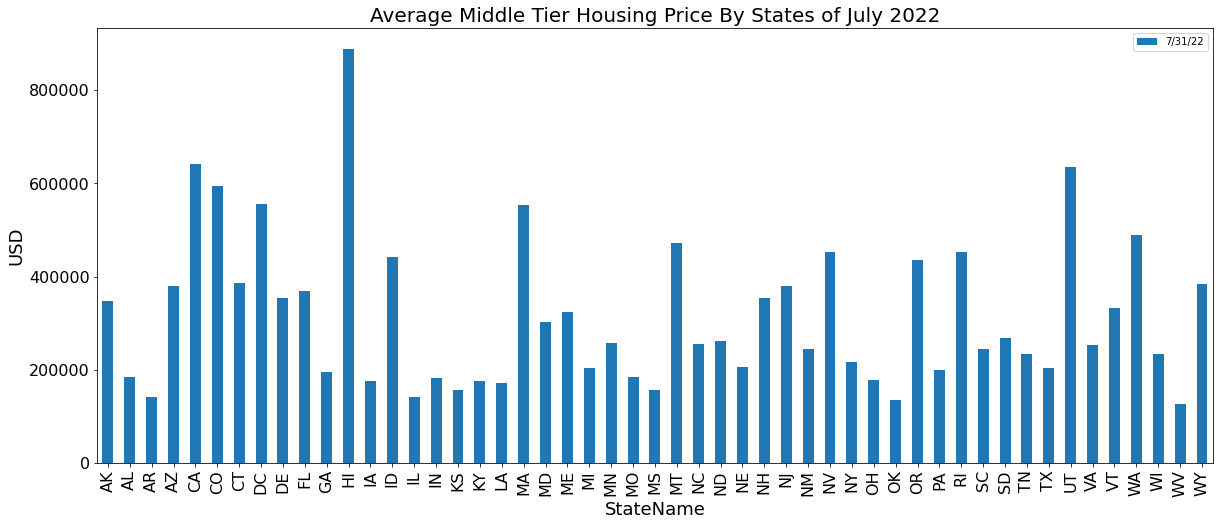

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# bystate.plot(kind="bar", color="red")
bystate.plot.bar('StateName','7/31/22', style='-o')
plt.xlabel('StateName', size=18)
plt.ylabel('USD', size=18)
plt.xticks(rotation=90,size=16)
plt.yticks(size=16)
plt.title("Average Middle Tier Housing Price By States of July 2022", size=20)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

In [10]:
# july_copy=july_df.copy()
# numbers=[*range(1,52,1)]
# numbers=pd.DataFrame(numbers, columns=["StateNo"])
# numbers


In [11]:
# july_copy["StateName"].tolist()

In [12]:
# states=july_copy["StateName"].unique().tolist()
# states

In [13]:
# dict={states[i]: numbers[i] for i in range(len(states))}
# dict

In [14]:
# for state in july_copy["StateName"].tolist()
#         if state in states
#         state=dict[state]

In [15]:
X, y = july_df[['7/31/20','7/31/21']], july_df['7/31/22']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) # use 10 trees
rf.fit(X, y)

RandomForestRegressor()

In [17]:
unknown_x = [330000, 350000]
predicted_y = rf.predict([unknown_x])
print(predicted_y)

[433665.03]


/Users/bibowang/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [18]:
from sklearn.metrics import mean_absolute_error

predictions = rf.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
print(f"${e:.0f} average error; {ep:.2f}% error")

$4960 average error; 1.85% error



## Checking model generality

In [19]:
from sklearn.model_selection import train_test_split

X, y = july_df[['7/31/20','7/31/21']], july_df['7/31/22']
# 20% of data goes into test set, 80% into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$14929 average error; 5.57% error


## Improve the accuracy

In [20]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$14415 average error; 5.38% error


# Add location

In [21]:
july_df

,StateName,7/31/20,7/31/21,7/31/22
1,NY,489474.0,553452.0,618517
2,CA,685733.0,815943.0,933282
3,IL,245313.0,277631.0,313828
4,TX,263109.0,313134.0,397905
5,PA,258636.0,301935.0,338231
...,...,...,...,...
903,TX,79789.0,89095.0,104979
904,CO,203485.0,233731.0,263752
905,TX,135280.0,154038.0,190824
906,TX,72824.0,78516.0,91552


In [22]:
dummy_df=pd.get_dummies(july_df)
dummy_df

,7/31/20,7/31/21,7/31/22,StateName_AK,StateName_AL,StateName_AR,StateName_AZ,StateName_CA,StateName_CO,StateName_CT,...,StateName_SD,StateName_TN,StateName_TX,StateName_UT,StateName_VA,StateName_VT,StateName_WA,StateName_WI,StateName_WV,StateName_WY
1,489474.0,553452.0,618517,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,685733.0,815943.0,933282,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,245313.0,277631.0,313828,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,263109.0,313134.0,397905,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,258636.0,301935.0,338231,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,79789.0,89095.0,104979,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
904,203485.0,233731.0,263752,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
905,135280.0,154038.0,190824,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
906,72824.0,78516.0,91552,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
y = dummy_df['7/31/22']
X = dummy_df.drop(columns=['7/31/22'])
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100) # use 10 trees
rf.fit(X, y)

RandomForestRegressor()

In [25]:
predictions = rf.predict(X)
e = mean_absolute_error(y, predictions)
ep = e*100.0/y.mean()
print(f"${e:.0f} average error; {ep:.2f}% error")

$4234 average error; 1.58% error


In [26]:
y = dummy_df['7/31/22']
X = dummy_df.drop(columns=['7/31/22'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [27]:
rf = RandomForestRegressor(n_estimators=10, random_state=78)
rf_model=rf.fit(X_train, y_train)


# Evaluate the model
y_pred = rf_model.predict(X_test)

#print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$13513 average error; 5.04% error


In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=78)
rf_model=rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e*100.0/y.mean():.2f}% error")

$12600 average error; 4.70% error


## Importance

In [31]:
from rfpimp import *
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I

,Importance
Feature,
7/31/21,1.340450e+00
7/31/20,8.436299e-02
StateName_FL,1.780862e-03
StateName_CA,7.224729e-04
StateName_CO,3.508346e-04
StateName_GA,3.124558e-04
StateName_NC,2.116378e-04
StateName_TN,1.610422e-04
StateName_MD,1.549808e-04


In [32]:
states=july_df.StateName.value_counts()
states

TX    65
OH    45
GA    37
NC    36
IN    36
PA    34
CA    33
MI    33
FL    28
IL    27
NY    26
TN    26
MO    25
WI    24
AL    21
OK    21
OR    20
MN    20
KS    20
AR    20
IA    19
WA    19
KY    17
CO    17
LA    17
NM    16
MS    16
SC    15
ID    13
NE    12
VA    12
AZ    11
SD    10
WV    10
UT     9
NV     9
WY     9
ND     8
MA     7
MT     7
MD     6
NH     6
CT     5
HI     4
AK     4
NJ     4
VT     4
ME     4
DE     2
RI     1
DC     1
Name: StateName, dtype: int64